In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot

In [6]:
df = pd.read_csv("groupeddf.csv")
df = df.dropna()
uniqueVals = df["Code"].unique()  
len(uniqueVals)
df=df.set_index("Code") #for loc function, creted index

In [7]:
def arima_model(train, test):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1 ,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        history.append(obs)
        print('predicted=%f, Actual Value=%f' % (yhat, obs))
    return predictions

In [8]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

Company name : 3IINFOTECH


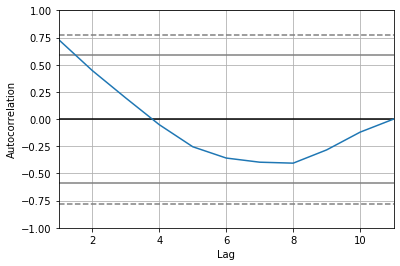

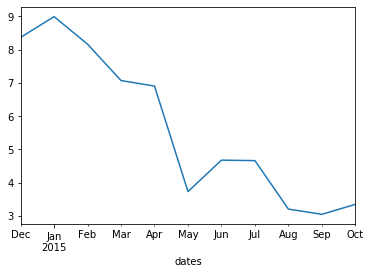

predicted=2.521238, Actual Value=4.663048
predicted=3.813087, Actual Value=3.206145
predicted=2.901418, Actual Value=3.048606
predicted=2.162019, Actual Value=3.348171
Test RMSE: 1.263


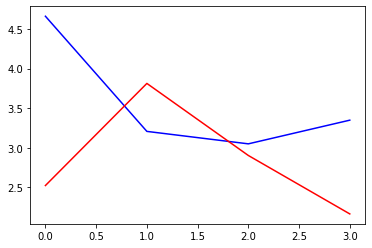

Company name : 8KMILES


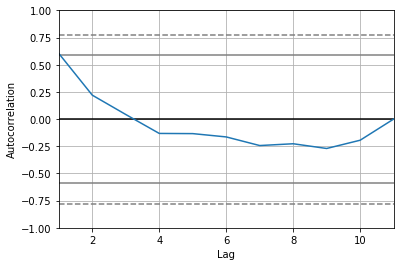

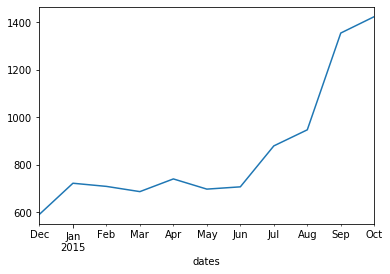

predicted=721.484495, Actual Value=879.681825
predicted=863.211881, Actual Value=947.393459
predicted=990.871242, Actual Value=1354.689960
predicted=1500.078689, Actual Value=1423.700000
Test RMSE: 206.344


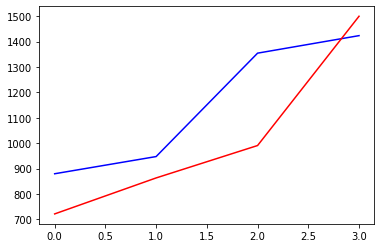

Company name : ABAN


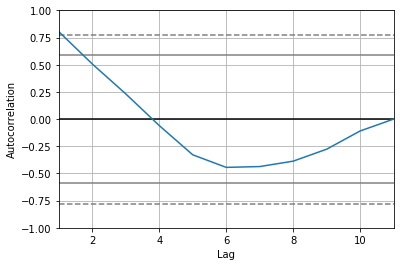

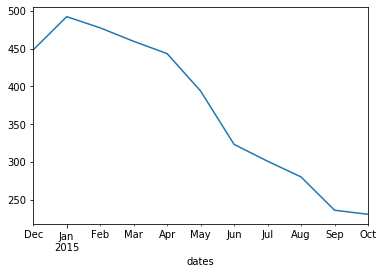

predicted=270.351971, Actual Value=301.090843
predicted=282.760044, Actual Value=280.225539
predicted=262.294744, Actual Value=236.175711
predicted=205.946943, Actual Value=230.738636
Test RMSE: 23.707


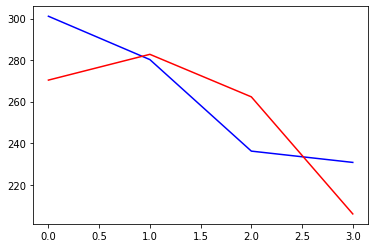

Company name : ABB


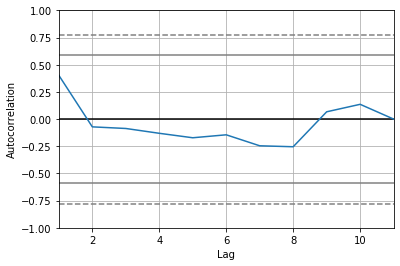

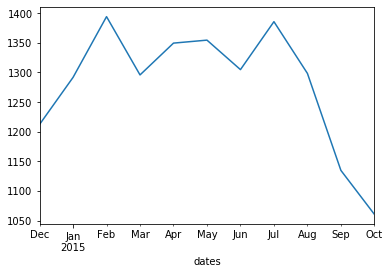

predicted=1340.508084, Actual Value=1385.768171
predicted=1381.581617, Actual Value=1298.446334
predicted=1363.649614, Actual Value=1134.712187
predicted=1139.773106, Actual Value=1060.549670
Test RMSE: 130.047


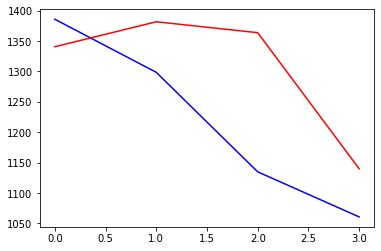

Company name : ABBOTINDIA


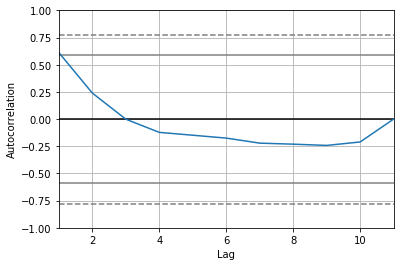

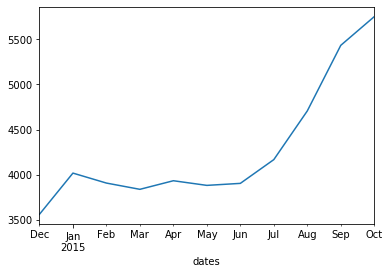

predicted=3939.387488, Actual Value=4168.029799
predicted=4103.433867, Actual Value=4706.805640
predicted=4982.864299, Actual Value=5432.858477
predicted=6008.206973, Actual Value=5750.471627
Test RMSE: 413.901


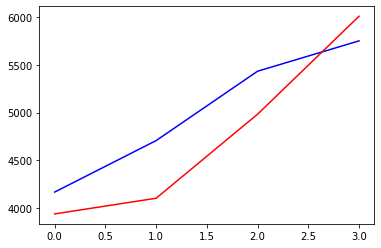

Company name : ABIRLANUVO


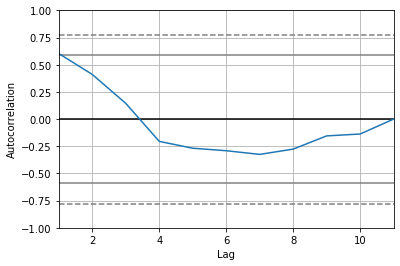

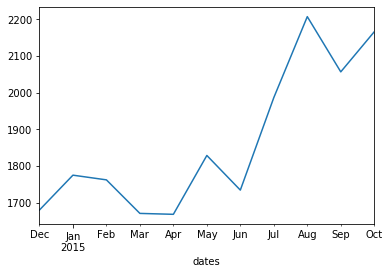

predicted=1783.606245, Actual Value=1986.509671
predicted=1871.719098, Actual Value=2207.243481
predicted=2270.415045, Actual Value=2056.686745
predicted=2149.977384, Actual Value=2165.988874
Test RMSE: 223.429


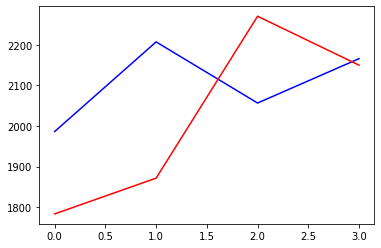

Company name : ACC


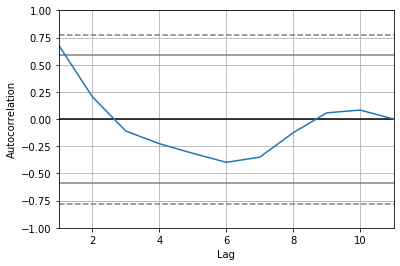

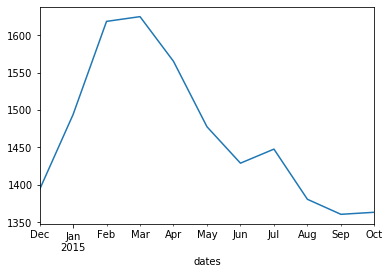

predicted=1400.997782, Actual Value=1447.831689
predicted=1468.668515, Actual Value=1380.824427
predicted=1343.550263, Actual Value=1360.764711
predicted=1352.164465, Actual Value=1363.489227
Test RMSE: 50.830


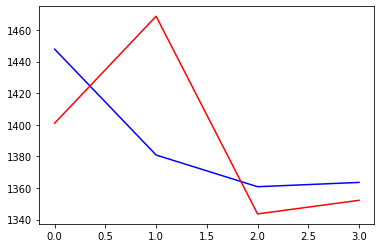

Company name : ADANIENT


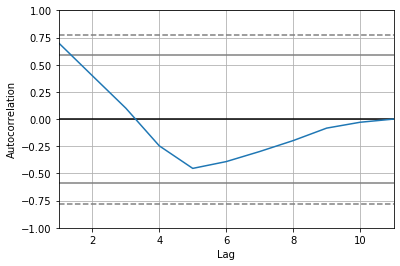

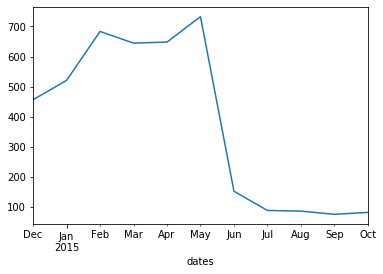

predicted=323.820741, Actual Value=87.778453
predicted=34.822433, Actual Value=85.496667
predicted=34.301326, Actual Value=74.907830
predicted=29.161648, Actual Value=81.238575
Test RMSE: 125.145


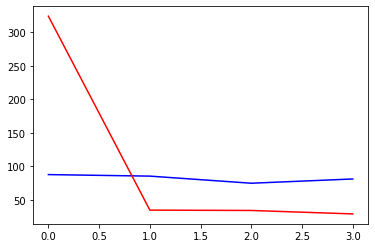

Company name : ADANIPORTS


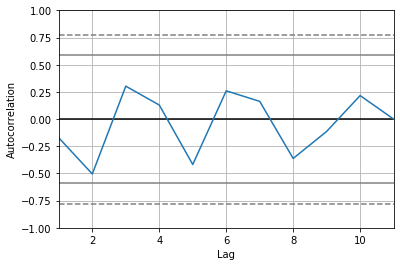

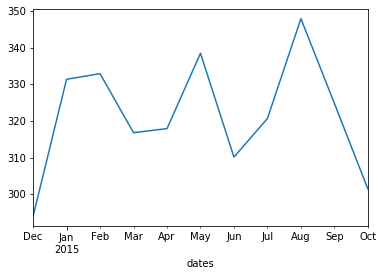

predicted=327.252478, Actual Value=320.662572
predicted=319.139910, Actual Value=347.915965
predicted=347.766287, Actual Value=324.793705
predicted=339.748997, Actual Value=301.446800
Test RMSE: 26.769


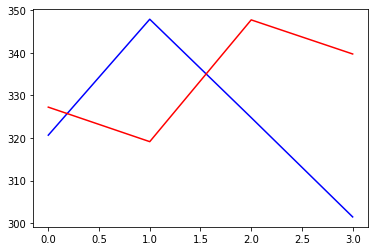

Company name : ADANIPOWER


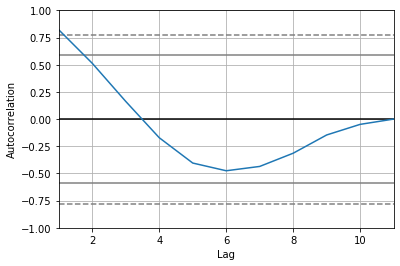

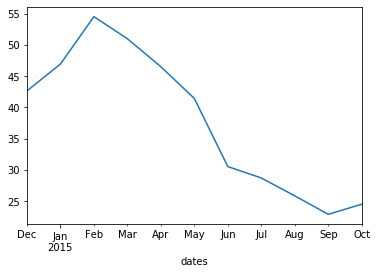

predicted=23.373875, Actual Value=28.724432
predicted=27.100859, Actual Value=25.864922
predicted=23.708737, Actual Value=22.915710
predicted=20.645659, Actual Value=24.532650
Test RMSE: 3.387


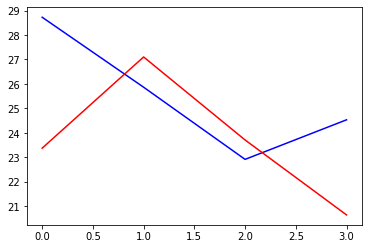

In [9]:
for company in uniqueVals[:10]:
    data=(df.loc[company,:]).reset_index()
    print ("Company name : %s" %company)
    data['Price'] = data['Close']
    data['Date'] = data['Date'].map(lambda x: str(x)[:7])
    Quantity_date = data[['Price','Date']]
    Quantity_date_count=Quantity_date.groupby(['Date'])['Price'].aggregate('mean').reset_index().sort_values(by='Date', ascending=0)
    date=list(Quantity_date_count['Date'])
    quantity=list(Quantity_date_count['Price'])
    date_quantity = pd.DataFrame({'dates': date, 'quantity':quantity})
    date_quantity.index = date_quantity['dates'].map(lambda x: parser(x))
    date_quantity['quantity'] = date_quantity['quantity'].map(lambda x: float(x))
    date_quantity = date_quantity.fillna(date_quantity.bfill())
    date_quantity = date_quantity['quantity'].resample('MS').mean()
    #plot autosorelation plot
    autocorrelation_plot(date_quantity)
    plt.show()
    #date and prices plot
    date_quantity.plot()
    plt.show()
    #train and test data
    quantity = date_quantity.values
    size = int(len(quantity) * 0.66)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    #fit in model
    predictions = arima_model(train, test)
    #rmse calculation
    error = math.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    #plot graph
    plt.plot(test,color='blue' )
    plt.plot(predictions, color='red')
    plt.show()